# Logistic Regression

To begin with, one of the most simplest and widely used algorithms in use is logistic regression. 

In [1]:
# Import necessary packages
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Model with oversample data

In [2]:
# Load the data
df = pd.read_csv('./../../data/engineered_data.csv')

In [3]:
# Drop the index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.columns

Index(['goal', 'state', 'currency_trailing_code', 'staff_pick',
       'backers_count', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
       'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_GB',
       'country_IT', 'country_NL', 'country_US', 'currency_CAD',
       'currency_EUR', 'currency_GBP', 'currency_USD', 'category_Experimental',
       'category_Festivals', 'category_Flight', 'category_Gadgets',
       'category_Hardware', 'category_Immersive', 'category_Makerspaces',
       'category_Musical', 'category_Plays', 'category_Robots',
       'category_Software', 'category_Sound', 'category_Wearables',
       'category_Web', 'created_to_launch', 'launch_to_deadline',
       'launch_to_state_change', 'is_mon_tue'],
      dtype='object')

In [5]:
df['country_US'].value_counts()

1.0    10158
0.0     4704
Name: country_US, dtype: int64

Before modelinng the data, it is necessary to split the data into training and testing set.

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=42)

### Modelling

#### Statsmodel Logistic Regression

In [13]:
logreg = sm.Logit(y_train, sm.add_constant(X_train)).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.295171
         Iterations 10


In [14]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:                11889
Model:                          Logit   Df Residuals:                    11854
Method:                           MLE   Df Model:                           34
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5237
Time:                        20:40:49   Log-Likelihood:                -3509.3
converged:                       True   LL-Null:                       -7368.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.3258        nan        nan        nan         nan         nan
goal                      -7.5483      0.578    -13.055      0.000      -8.682      -6.415
curr

### Scikit Learn Logistic Regression

In [9]:
logreg_clf = LogisticRegression(penalty='none', random_state=0).fit(X_train, y_train)

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
logreg_clf.score(X_test, y_test)

0.8715102589976454

<AxesSubplot: >

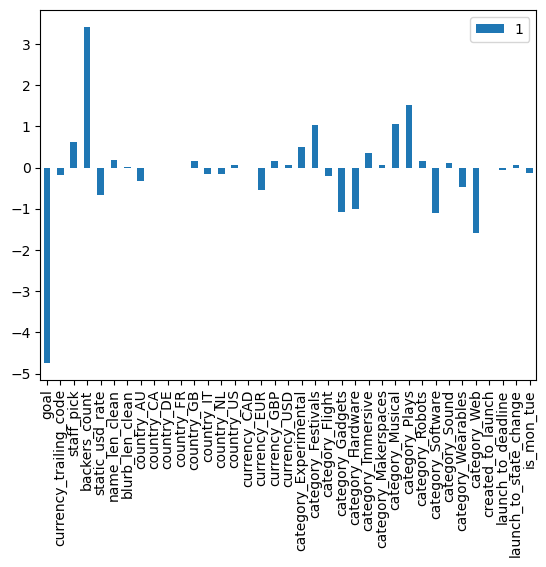

In [11]:
pd.DataFrame([X_train.columns, logreg_clf.coef_[0]], columns=X_train.columns).T.plot.bar()